In [2]:
# 导包
import torch
import numpy as np
import torch.nn as nn
import scipy
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import scipy.spatial

np.random.seed(0)

In [3]:
glove_matrix = np.load("../pretrain/glove_wikitext_embeddings.npy")

word_to_idx = np.load(r"../pretrain/globe_wikitext_vocab.npy",allow_pickle=True).item()

idx_to_word = {value: key for key, value in word_to_idx.items()}

In [4]:
def get_idx(word):
    idx = 0
    if word in word_to_idx.keys():
        idx = word_to_idx[word]
    else:
        idx = word_to_idx['<unk>']
    return idx

def get_idxes(words):
    idx = []
    for i in words:
        if i in word_to_idx.keys():
            idx.append(word_to_idx[i])
        else:
            idx.append(word_to_idx['<unk>'])
    return idx

In [5]:
def find_nearest(word, embedding_weights):
    index = get_idx(word)
    embedding = embedding_weights[index]
    cos_dis = np.array([scipy.spatial.distance.cosine(e, embedding) for e in embedding_weights])
    return [idx_to_word[i] for i in cos_dis.argsort()[:10]]

In [6]:
words = ['red', 'green', 'computer']
idx = get_idxes(words)
vectors = []
for i in idx:
    vectors.append(glove_matrix[i])
input1 = torch.tensor(vectors[0]).resize(1, 50)
input2 = torch.tensor(vectors[1]).resize(1, 50)
input3 = torch.tensor(vectors[2]).resize(1, 50)
cos = nn.CosineSimilarity(dim=1)
print(cos(input1, input2))
print(cos(input1, input3))
print(cos(input3, input2))

tensor([0.8221])
tensor([0.3054])
tensor([0.2795])


d:\python38\lib\site-packages\torch\_tensor.py:493: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


In [7]:
for word in ["one", "green", "computer"]:
    print(word, find_nearest(word, glove_matrix))

one ['one', 'eight', 'three', 'two', 'four', 'seven', 'six', 'nine', 'five', 'zero']
green ['green', 'blue', 'white', 'red', 'black', 'color', 'brown', 'light', 'cross', 'side']
computer ['computer', 'computers', 'hardware', 'software', 'systems', 'technology', 'program', 'using', 'machines', 'digital']


In [8]:
indexs = ['one', 'eight', 'three', 'two', 'four', 'seven', 'six', 'nine', 'five', 'zero',
         'green', 'blue', 'white', 'red', 'black', 'color', 'brown', 'light', 'cross', 'side',
         'computer', 'computers', 'hardware', 'software', 'systems', 'technology', 'program', 'using', 'machines', 'digital']
random.shuffle(indexs)
ids = get_idxes(indexs)

wordvectors = []
for i in ids:
    wordvectors.append(glove_matrix[i])
wordvectors = np.array(wordvectors)
print(wordvectors.shape)

(30, 50)


In [9]:
pca = PCA(n_components=2)
wordvectors = pca.fit_transform(wordvectors)
wordvectors = pd.DataFrame(wordvectors)
from sklearn.cluster import KMeans
classCount = 3
clf = KMeans(n_clusters=classCount)
clf.fit(wordvectors)
predicts = clf.predict(wordvectors)
for i, j in zip(indexs, clf.labels_):
    print(i, ":", j, end='  ')

six : 0  red : 1  zero : 0  black : 1  computers : 2  color : 1  white : 1  seven : 0  technology : 2  two : 0  light : 1  using : 2  one : 0  three : 0  systems : 2  computer : 2  eight : 0  blue : 1  software : 2  hardware : 2  cross : 1  machines : 2  brown : 1  program : 2  four : 0  green : 1  nine : 0  digital : 2  side : 1  five : 0  

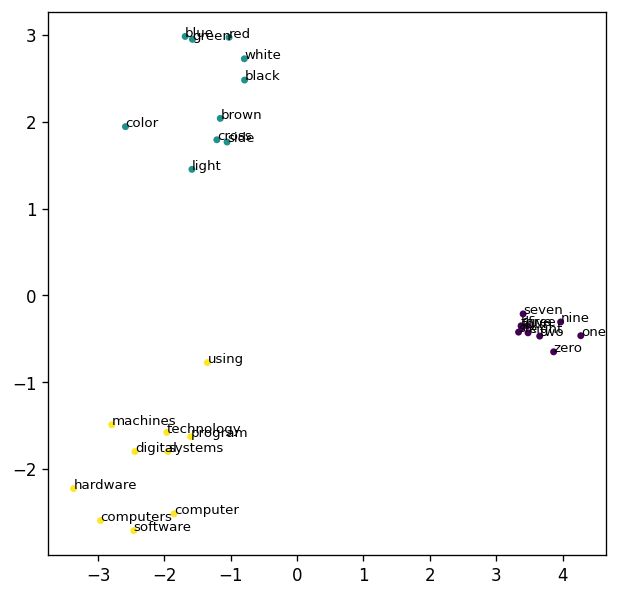

In [10]:
plt.figure(dpi=120, figsize=(6, 6))
plt.scatter(x=wordvectors[0],y=wordvectors[1],s=10, c=predicts)

for i, label in enumerate(indexs):
    plt.annotate(label, (wordvectors[0][i],wordvectors[1][i]), fontsize=8)
plt.show()

In [11]:
for word in ["surgery", "virus"]:
    print(word, find_nearest(word, glove_matrix))

surgery ['<unk>', 'and', 'of', 'the', 'in', 'a', 'with', 'by', 'from', 'for']
virus ['<unk>', 'and', 'of', 'the', 'in', 'a', 'with', 'by', 'from', 'for']
